# Logistic Regression

In [117]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
import sklearn.datasets

seed = 42

## Binary

### Exercise 1
Load the data from `admit.csv` into a DataFrame called `admit_df`. Print the top few rows.

In [97]:
admit_df = pd.read_csv('admit.csv')
admit_df.head()

Unnamed: 0  admit  gre   gpa  rank
0           0      0  380  3.61     3
1           1      1  660  3.67     3
2           2      1  800  4.00     1
3           3      1  640  3.19     4
4           4      0  520  2.93     4

### Exercise 2
Drop the columns named `Unnamed: 0` and `rank`. Print the top few rows.

In [98]:
admit_df = admit_df.drop(columns=['Unnamed: 0', 'rank'])
admit_df.head()

admit  gre   gpa
0      0  380  3.61
1      1  660  3.67
2      1  800  4.00
3      1  640  3.19
4      0  520  2.93

### Exercise 3
Check for missing values. If any, handle them.

In [99]:
admit_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   admit   400 non-null    int64  
 1   gre     400 non-null    int64  
 2   gpa     400 non-null    float64
dtypes: float64(1), int64(2)
memory usage: 9.5 KB


### Exercise 4
Get the name of the target variable: `admit`.

In [100]:
target = 'admit'

### Exercise 5
Split the data for training ($60\%$) and testing ($40\%$).

In [101]:
admit_train, admit_test = train_test_split(admit_df, 
                                     train_size=0.6, 
                                     random_state=seed, 
                                     stratify=admit_df[target])

### Exercise 6
Now, reset the index of both train and test Dataframes.

In [102]:
# Reset the index
admit_train, admit_test = admit_train.reset_index(drop=True), admit_test.reset_index(drop=True)

### Exercise 7
Print the dimension of `admit_train`.

In [103]:
pd.DataFrame([[admit_train.shape[0], admit_train.shape[1]]], columns=['# rows', '# columns'])

# rows  # columns
0     240          3

### Exercise 8
Print the dimension of `admit_test`.

In [104]:
pd.DataFrame([[admit_test.shape[0], admit_test.shape[1]]], columns=['# rows', '# columns'])

# rows  # columns
0     160          3

### Exercise 9
Split the features and the target.

In [105]:
# Features
X_train = admit_train[np.setdiff1d(admit_train.columns, [target])].values
X_test = admit_test[np.setdiff1d(admit_test.columns, [target])].values

# Target
y_train = admit_train[target].values
y_test = admit_test[target].values

### Exercise 10
Standardize the features.
In Logistic regression, it helps the convergence of the optimization.

In [106]:
ss = StandardScaler()

# training data
X_train = ss.fit_transform(X_train)

# test data
X_test = ss.transform(X_test)

### Exercise 11
Check for class imbalance in the training dataset. Why do think we should care?

In [107]:
pd.Series(y_train).value_counts()

0    164
1     76
Name: count, dtype: int64

### Exercise 12
Now, combine the train and test datasets into something temporary, say `df`.

In [108]:
df = pd.concat([admit_train, admit_test], sort=False)
df.head()

admit  gre   gpa
0      0  480  2.55
1      1  680  3.27
2      1  780  3.80
3      1  620  3.61
4      0  520  3.10

### Exercise 13
Plot the scatter.

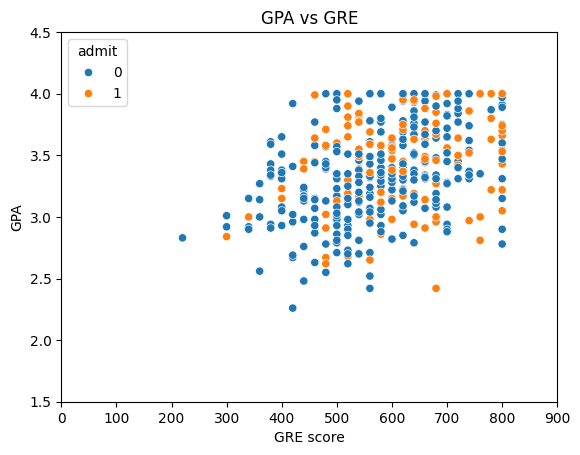

In [109]:
sns.scatterplot(x = 'gre', y = 'gpa', hue='admit',  data = admit_df)
plt.xlabel("GRE score")
plt.xlim(0, 900)
plt.ylim(1.5, 4.5)
plt.ylabel("GPA")
plt.title("GPA vs GRE")
plt.show()

### Exercise 14
Logistic regression

In [110]:
admitlogit = LogisticRegression()  # instantiate
admitlogit.fit(X_train, y_train)
print('Logit model accuracy (with the test set):', admitlogit.score(X_test, y_test))
print('Logit model accuracy (with the train set):', admitlogit.score(X_train, y_train))

Logit model accuracy (with the test set): 0.68125
Logit model accuracy (with the train set): 0.6791666666666667


In [111]:
print(admitlogit.predict(X_test))

[0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 1 0 0 0 0 0]


In [112]:
print(admitlogit.predict_proba(X_train[:8]))
print(admitlogit.predict_proba(X_test[:8]))

[[0.86143559 0.13856441]
 [0.64861603 0.35138397]
 [0.46904575 0.53095425]
 [0.63478008 0.36521992]
 [0.78150305 0.21849695]
 [0.84730802 0.15269198]
 [0.86551076 0.13448924]
 [0.7124068  0.2875932 ]]
[[0.67612162 0.32387838]
 [0.67965061 0.32034939]
 [0.76213585 0.23786415]
 [0.8157402  0.1842598 ]
 [0.83252369 0.16747631]
 [0.53049001 0.46950999]
 [0.68693833 0.31306167]
 [0.59460514 0.40539486]]


In [113]:
print( classification_report( y_test, admitlogit.predict(X_test) ) )


              precision    recall  f1-score   support

           0       0.69      0.95      0.80       109
           1       0.50      0.10      0.16        51

    accuracy                           0.68       160
   macro avg       0.60      0.53      0.48       160
weighted avg       0.63      0.68      0.60       160



In [114]:
admitlogit.coef_

array([[0.28560897, 0.4039814 ]])

## Multiclass

In [135]:
wine = sklearn.datasets.load_wine(as_frame=True)
wine_df = wine.frame
wine_df.head()
target = 'target'

In [136]:
wine_train, wine_test = train_test_split(wine_df, 
                                     train_size=0.7, 
                                     random_state=seed, 
                                     stratify=wine_df[target])

In [138]:
pd.DataFrame([[wine_train.shape[0], wine_train.shape[1]]], columns=['# rows', '# columns'])
#pd.DataFrame([[wine_train.shape[0], wine_train.shape[1]]], columns=['# rows', '# columns'])

# rows  # columns
0     124         14

In [140]:
# Features
X_train = wine_train[np.setdiff1d(wine_train.columns, [target])].values
X_test = wine_test[np.setdiff1d(wine_test.columns, [target])].values

# Target
y_train = wine_train[target].values
y_test = wine_test[target].values

In [141]:
winelogit = LogisticRegression()  # instantiate
winelogit.fit(X_train, y_train)
print('Logit model accuracy (with the test set):', winelogit.score(X_test, y_test))
print('Logit model accuracy (with the train set):', winelogit.score(X_train, y_train))

Logit model accuracy (with the test set): 0.9814814814814815
Logit model accuracy (with the train set): 0.9596774193548387


/opt/miniconda3/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [142]:
winelogit.coef_

array([[-2.39643171e-01, -8.11847383e-02,  1.29719266e-01,
         9.07526707e-03,  4.40284718e-01, -1.03553857e-03,
        -1.18628477e-02,  1.46201722e-01, -6.19247094e-03,
         2.56068843e-01,  2.28291555e-02,  6.61292791e-03,
         2.08795532e-01],
       [ 1.92949127e-01,  3.24282028e-01, -1.55833742e-01,
        -1.16735317e+00,  3.57062383e-01,  2.08903751e-01,
         2.14077542e-02, -6.68249147e-01, -2.72428788e-03,
         3.80337974e-01,  3.47207007e-01, -7.46694693e-03,
         1.71230410e-01],
       [ 4.66940442e-02, -2.43097289e-01,  2.61144763e-02,
         1.15827791e+00, -7.97347101e-01, -2.07868213e-01,
        -9.54490647e-03,  5.22047426e-01,  8.91675882e-03,
        -6.36406816e-01, -3.70036162e-01,  8.54019016e-04,
        -3.80025942e-01]])